In [1]:
%matplotlib inline
import pysal
import numpy as np
import random
import geopandas as gp
import acs_regionalization as ACS

In [2]:
# read in estimates and standard errors
ests = np.genfromtxt('example_data/99999_a225_p9_pop9999_k3_j0_est.csv', delimiter=',')
sdes = np.genfromtxt('example_data/99999_a225_p9_pop9999_k3_j0_stdErr.csv', delimiter=',')
# build the spatial connectivity
shp = pysal.open('example_data/99999_225.shp')    
w = pysal.rook_from_shapefile('example_data/99999_225.shp')
# convert standard error to margin of error
moes = sdes * 1.645

[]

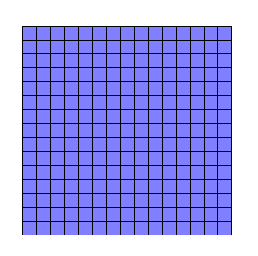

In [3]:
# take a look at the map
shp_map = gp.read_file('example_data/99999_225.shp')
shp_map['constant'] = 1
p = shp_map.plot('constant', alpha=0.5, colormap='winter')
p.axis('off')
p.plot()

[]

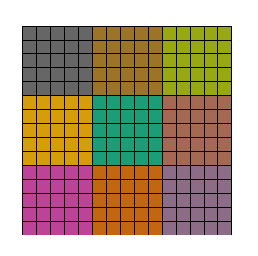

In [4]:
# since this is a "toy" example, we built the data with a "true" map in mind
# these are the regions in the true map
p = shp_map.plot('region', alpha=1, colormap='Dark2')
p.axis('off')
p.plot()

In [6]:
# set some seeds to get the same solution each time
start_seed = 5009
random.seed(start_seed)
np.random.seed(start_seed)
# run the regionalization algorithm
results = ACS.ACS_Regions(w=w,
                          target_est_count=ests[:,3:],
                          target_moe_count=moes[:,3:], 
                          target_th_all=0.15,
                          count_est=ests[:,2],
                          count_th_min=46000,
                          base_solutions=100,
                          pca=False,
                          compactness=shp)

[]

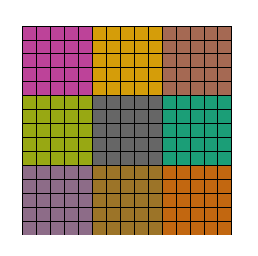

In [7]:
# we can plot the results
# note that the shapes of the regions found by the algorithm match the
# "true" regions;(the color arrangement is different simply because the
# algorithm assigned region IDs randomly)  
shp_map['rids'] = results.region_ids
p = shp_map.plot('rids', alpha=1, colormap='Dark2')
p.axis('off')
p.plot()